# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the dataset

### Source of dataset
https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
dataset = pd.read_csv("creditcard.csv")

# Explore the features in the dataset

### For confidential reasons, the PCA transformation has already been performed in this dataset
### Hence the variable headers or the values may not seem intuitive
### However, this will not be huge issue in order to demonstrate our use case. Here 'Class' is the target/dependent variable that depicts whether a particular transaction is fraud or non-fraud where 1 denotes fraud and 0 denotes non-fraud. This is a highly imbalanced dataset with Number of Frauds being only 0.2%


In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Count number of Fraud cases as a ratio of total transactions in the data

count = dataset['Class'].value_counts()
print(count)
print(count / len(dataset.index))

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    0.998273
1    0.001727
Name: count, dtype: float64


# Independent variables and Target/Dependent variable

In [5]:
x = dataset.iloc[:, 2:30].values
y = dataset.iloc[:,-1].values

# Visualize the data

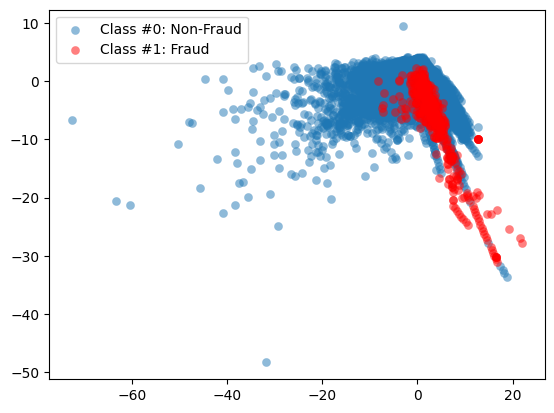

In [6]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], label="Class #0: Non-Fraud", alpha=0.5, linewidth=0.15)
plt.scatter(x[y == 1, 0], x[y == 1, 1], label="Class #1: Fraud", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

# Split into training and test set

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (x,y, test_size=0.2, random_state=0)

# Training Random Forest

In [8]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [9]:
# Predict Y on the test set
y_pred = classifier.predict(x_test)

In [10]:
# Obtain the results from the classification report and confusion matrix 
from sklearn.metrics import  classification_report, confusion_matrix 

print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.94      0.75      0.84       101

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56856     5]
 [   25    76]]


### Explanation of the results
With Random forest with basic default settings, we get pretty good accuracy and precision of 94%. 
But note that the recall is 75%. In this case,more than precision we are more concerned about recall because we want to catch as many fraudulent cases as possible

# Undersampling

In [11]:
# This is the pipeline module we need from imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = RandomUnderSampler()
model = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)

# Define the pipeline,and combine sampling method with the RF model
pipeline = Pipeline([('RandomUnderSampler', resampling), ('RF', model)])

pipeline.fit(x_train, y_train) 
predicted = pipeline.predict(x_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.07      0.91      0.13       101

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Confusion matrix:
 [[55583  1278]
 [    9    92]]


In [12]:
import sklearn
import imblearn

print(sklearn.__version__)
print(imblearn.__version__)


1.3.2
0.11.0


### With undersampling the recall improves to 89% and we are able to capture more Frauds (90 vs 76).But precision drops a lot and so does the F-score

# Oversampling

In [13]:
# This is the pipeline module we need from imblearn
from imblearn.over_sampling import RandomOverSampler

# Define which resampling method and which ML model to use in the pipeline
resampling = RandomOverSampler()
model = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)

# Define the pipeline,and combine sampling method with the RF model
pipeline = Pipeline([('RandomOverSampler', resampling), ('RF', model)])

pipeline.fit(x_train, y_train) 
predicted = pipeline.predict(x_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.93      0.81      0.87       101

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56855     6]
 [   19    82]]


### With oversampling, we can capture more frauds (82 vs 76). Here the accuracy and F-score has also improved along with precision.

# SMOTE

In [14]:
# This is the pipeline module we need from imblearn

from imblearn.over_sampling import SMOTE


# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(sampling_strategy='auto',random_state=0)
model = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)

# Define the pipeline, tell it to combine SMOTE with the RF model
pipeline = Pipeline([('SMOTE', resampling), ('RF', model)])

pipeline.fit(x_train, y_train) 
predicted = pipeline.predict(x_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.85      0.84      0.85       101

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56846    15]
 [   16    85]]


### With SMOTE results are similar, but we are able to capture 1 more fraud from simple oversampling. The recall has also improved, though the false postives have increased now to 15 vs 4 earlier